In [1]:
import pandas as pd
from datetime import datetime

D:\anaconda\envs\example_env\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\anaconda\envs\example_env\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
D:\anaconda\envs\example_env\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
D:\anaconda\envs\example_env\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
q1 = pd.read_csv("Problem1_DataSet.csv")
q1["Month"]=q1["Month"].apply(lambda x: datetime.strptime(x, '%b-%Y'))


In [3]:
import matplotlib as plt
from matplotlib import pyplot as plt

# Q1

## 1)

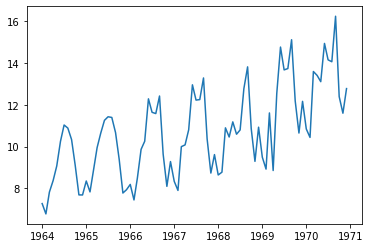

In [4]:
plt.plot(q1["Month"],q1["Miles, in Millions"])

## 2)


In [5]:
import statsmodels.api as sm

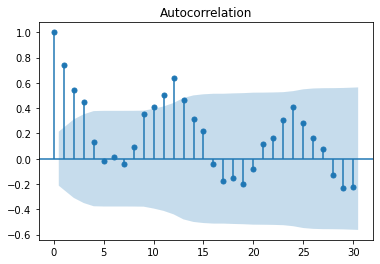

In [6]:
sm.graphics.tsa.plot_acf(q1["Miles, in Millions"], lags=30)
plt.show()

#### From the ACF graph, we can see that the seasonal period is 12.


## 3)

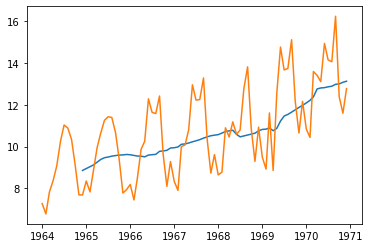

In [7]:
# simple moving average
def n_SMA(data,n):
    result=[]
    for i in range(len(data)-n+1):
        result.append(sum(data[i:i+n])/n)
    return result
window=12
q1_ma=n_SMA(q1["Miles, in Millions"],window)

plt.plot(q1["Month"][window-1:],q1_ma)
plt.plot(q1["Month"],q1["Miles, in Millions"])

#### The suitable choice for average window length is 12 because it eliminate the random fluctation of the data and the seasonality. At the same time, it keeps the trend.


## 4)


#### the trend is linear increasing.

## 5)


In [8]:
from statsmodels.tsa.statespace.tools import diff
#first difference of the data
diffed = diff(q1["Miles, in Millions"])

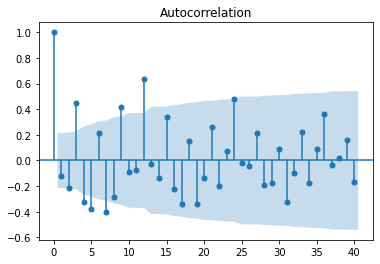

D:\anaconda\envs\example_env\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


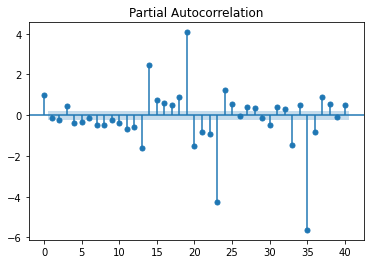

In [9]:
sm.graphics.tsa.plot_acf(list(diffed), lags=40)
plt.show()
sm.graphics.tsa.plot_pacf(list(diffed), lags=40)
plt.show()

####  After taking the first difference of data the significant lags are shown below.
#### ACF : 3,4,5,7,9,12
#### PACF: Unlinke ACF,(there is no significant lag after 12) there are many significant lags in PACF and shows no sign of decreasing, which means as the data increase the number of significant lag increase.  I couldn't give a list because the list is alway expanding as the number of data increase.


## 6)

In [10]:
seasonal_comp= [0]*12
diffed_seasonal=list(diffed)[12:]+seasonal_comp
season_diff=[]
for a, b in zip(diffed_seasonal,diffed):
    season_diff.append(a-b)
season_diff=season_diff[:-12]

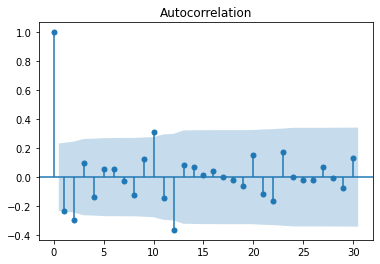

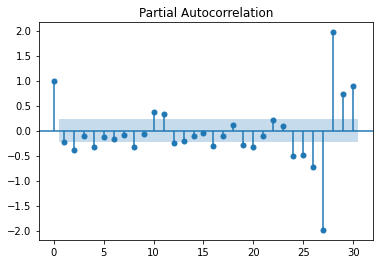

In [14]:
sm.graphics.tsa.plot_acf(season_diff, lags=30)
plt.show()
sm.graphics.tsa.plot_pacf(season_diff, lags=30)
plt.show()

#### Base on the ACF and PACF, the significant lag : ACF:2,10,12 PACF: : Unlinke ACF,(there is no significant lag after 12) there are many significant lags in PACF and shows no sign of decreasing, which means as the data increase the number of significant lag increase.  I couldn't give a list because the list is alway expanding as the number of data increase.

## 7)

### a)

In [24]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [25]:
def opt_SARIMA(p_list, data):
    result =[]
    for p in p_list:
        try: 
            model = sm.tsa.statespace.SARIMAX(data, order=(p[0], 1, p[1]), seasonal_order=(p[2], 1, p[3], 12)).fit()
        except:
            continue
        pre=model.predict()
        mse=mean_squared_error(data,pre)
        aic = model.aic
        bic=model.bic
        result.append([p, aic,bic,mse])
    result_df = pd.DataFrame(result)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC','BIC',"mse"]
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    
    return result_df

In [26]:
from itertools import product

In [27]:
p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 1
Q = range(0, 4, 1)
parameters = list(product(p, q, P, Q))

In [28]:
result = opt_SARIMA(parameters, q1["Miles, in Millions"][:72])

D:\anaconda\envs\example_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
D:\anaconda\envs\example_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
D:\anaconda\envs\example_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
D:\anaconda\envs\example_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except

D:\anaconda\envs\example_env\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
D:\anaconda\envs\example_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
D:\anaconda\envs\example_env\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
D:\anaconda\envs\example_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
D:\anaconda\envs\example_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py

D:\anaconda\envs\example_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
D:\anaconda\envs\example_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
D:\anaconda\envs\example_env\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
D:\anaconda\envs\example_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
D:\ana

D:\anaconda\envs\example_env\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
D:\anaconda\envs\example_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
D:\anaconda\envs\example_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
D:\anaconda\envs\example_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
D:\ana

D:\anaconda\envs\example_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
D:\anaconda\envs\example_env\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
D:\anaconda\envs\example_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
D:\anaconda\envs\example_env\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
D:\anaconda\envs\example_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too f

D:\anaconda\envs\example_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
D:\anaconda\envs\example_env\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
D:\anaconda\envs\example_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
D:\anaconda\envs\example_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
D:\anaconda\envs\example_env\l

D:\anaconda\envs\example_env\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
D:\anaconda\envs\example_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\anaconda\envs\example_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
D:\anaconda\envs\example_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\anaconda\envs\example_env\lib\site-packages\statsmodels\tsa\sta

D:\anaconda\envs\example_env\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
D:\anaconda\envs\example_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
D:\anaconda\envs\example_env\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
D:\anaconda\envs\example_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
D:\anaconda\envs\example_env\lib\site-packages\statsmodels\base\model.py:568: Conver

In [33]:
result

,"(p,q)x(P,Q)",AIC,BIC,mse
0,"(2, 3, 1, 0)",147.283497,161.826260,1.402788
1,"(2, 3, 0, 1)",147.796285,162.339047,1.408308
2,"(0, 2, 1, 0)",148.968651,157.278801,1.469566
3,"(0, 2, 0, 1)",149.224977,157.535127,1.474030
4,"(2, 3, 2, 0)",149.236263,165.856562,1.402666
...,...,...,...,...
251,"(0, 0, 1, 3)",170.538563,180.926250,1.679877
252,"(1, 0, 3, 3)",172.408452,189.028751,1.620837
253,"(0, 0, 3, 2)",172.533948,184.999173,1.679599
254,"(0, 0, 2, 3)",172.533948,184.999173,1.679600


#### the best parameter is (2,1,3)(1,1,0,12)  It has the least AIC

In [34]:
model = sm.tsa.statespace.SARIMAX(q1["Miles, in Millions"][:72], order=(2, 1, 3), seasonal_order=(1, 1, 0, 12)).fit()

D:\anaconda\envs\example_env\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [37]:
forc=model.get_forecast(steps=12)

In [40]:
forc=forc.summary_frame()["mean"].to_list()

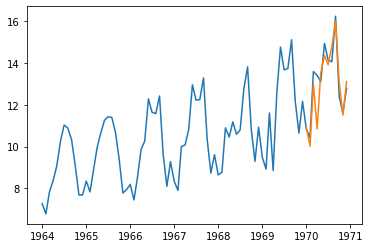

In [45]:
plt.plot(q1["Month"],q1["Miles, in Millions"])
plt.plot(q1["Month"][-12:],forc)

#### The blue line represent the original data, and the yellow line is the prediction reuslt. From my perspective, the model did a great job 
#### on predeicting the 7th year, since the it correctly predict the trend , the seasonality. Most of the blue line and orange line are overlap
#### each other, which shows the prediction is very close to the real data.

# Q2

## A)

In [3]:
df = pd.read_csv("TotalWine.csv")

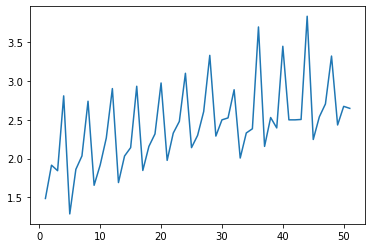

In [4]:
plt.plot(df["Time (Quarter)"],df["TotalWine"])

#### The seasonal period for this time series is 4

## B)

In [5]:
def season_d(data, s):
    s_d=data[s:]
    result=[a_i - b_i for a_i, b_i in zip(s_d, data[:-s])]
    return result

In [6]:
wine_l=list(df["TotalWine"])
wine_l_one=season_d(wine_l,1)
wine_l_two=season_d(wine_l,2)
wine_l_four=season_d(wine_l,4)
wine_l_six=season_d(wine_l,6)
wine_l_tw=season_d(wine_l,12)


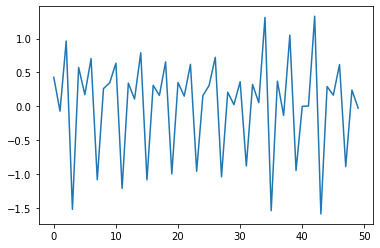

In [7]:
# when lag = 1
plt.plot(wine_l_one)

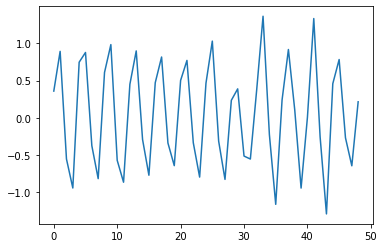

In [8]:
# when lag = 2
plt.plot(wine_l_two)

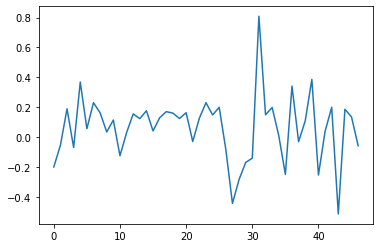

In [9]:
# when lag = 4
plt.plot(wine_l_four)

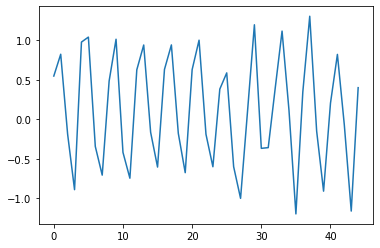

In [10]:
# when lag = 6
plt.plot(wine_l_six)

#### when lag =4 it is most useful to remove seasonality.

## C)

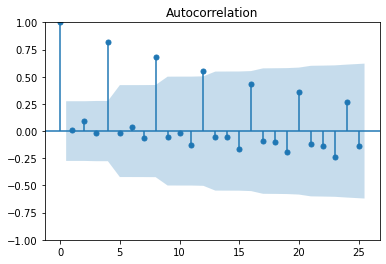

In [13]:
sm.graphics.tsa.plot_acf(df["TotalWine"], lags=25)
plt.show()

In [12]:
import statsmodels.api as sm

#### We see that the seasonal peroid is 4 base on the ACF graph.

## d)

In [19]:
from statsmodels.tsa import ar_model

In [170]:
mod = ar_model.ar_select_order(df["TotalWine"],maxlag=10,seasonal = True,
                               trend="t", period =4,glob= True,ic ="aic")

In [171]:
mod.ar_lags


[8]

In [172]:
mod_fit=ar_model.AutoReg(df["TotalWine"],lags=[8],seasonal = True, period =4,trend="t").fit()

In [174]:
mod_fit.aic



-31.77905501918906

#### Base on ar_selcet_order, it shows that [8] is the best model order.

In [199]:
mod_fit_sea=ar_model.AutoReg(wine_l_four,lags=[8]).fit()
prediction=mod_fit_sea.predict(start = 8, end =50)


In [200]:
prediction

array([-0.03889306,  0.01348803,  0.10163275,  0.0080693 ,  0.1662963 ,
        0.05358665,  0.11644396,  0.09187903,  0.04563918,  0.07453909,
       -0.01179939,  0.04383293,  0.08935029,  0.07779033,  0.09693652,
        0.04816792,  0.07995782,  0.09476903,  0.09115654,  0.07815158,
        0.09224028,  0.02251925,  0.07887408,  0.11644396,  0.08682155,
        0.10524524,  0.00337306, -0.12703778, -0.06923796, -0.02805559,
       -0.01757937,  0.32524581,  0.0871828 ,  0.10488399,  0.03696921,
       -0.0569555 ,  0.15654258,  0.022158  ,  0.0723716 ,  0.17279878,
       -0.0584005 ,  0.04708417,  0.10524524])

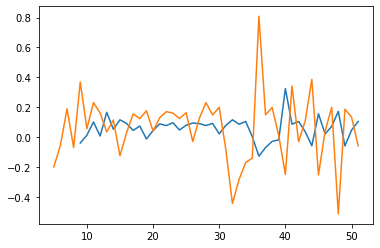

In [202]:
plt.plot(df["Time (Quarter)"][-43:],prediction)
plt.plot(df["Time (Quarter)"][-47:],wine_l_four)

#### The orange line represent the difference data and the blue line represent the prediction result.

In [204]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(wine_l_four[-43:],prediction)

In [205]:
mse

0.07804861563077302

#### the mse are 0.078